# Exploratory Data Analysis - (Ames, Iowa Housing)

## Loading the Data and Initial Cleanup

In [1]:
source('../src/load_data.r')
source('../src/multiplot.r')

In [2]:
library(plyr)
library(ggplot2)

In [3]:
dim(housing_df)

[1] 2903   80

In [4]:
str(housing_df)

'data.frame':	2903 obs. of  80 variables:
 $ MSSubClass   : Factor w/ 16 levels "20","30","40",..: 1 1 1 1 6 6 12 12 12 6 ...
 $ MSZoning     : Factor w/ 7 levels "A (agr)","C (all)",..: 6 5 6 6 6 6 6 6 6 6 ...
 $ LotFrontage  : num  141 80 81 93 74 78 41 43 39 60 ...
 $ LotArea      : int  31770 11622 14267 11160 13830 9978 4920 5005 5389 7500 ...
 $ Street       : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ Alley        : Factor w/ 4 levels "","Grvl","Pave",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ LotShape     : Factor w/ 4 levels "IR1","IR2","IR3",..: 1 4 1 4 1 1 4 1 1 4 ...
 $ LandContour  : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 2 4 4 ...
 $ Utilities    : Factor w/ 3 levels "AllPub","NoSeWa",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ LotConfig    : Factor w/ 5 levels "Corner","CulDSac",..: 1 5 1 1 5 5 5 5 5 5 ...
 $ LandSlope    : Factor w/ 3 levels "Gtl","Mod","Sev": 1 1 1 1 1 1 1 1 1 1 ...
 $ Neighborhood : Factor w/ 28 levels "Blmngtn","Blueste",..: 16 16 16 16 9 9 

## Time Relationship
From the table and the plot below we can see how sales were ditributed for each year/month combination. There is a cyclical pattern for the number of sales by month.

In [5]:
table(housing_df$YrSold);prop.table(table(housing_df$YrSold,housing_df$MoSold),1)


2006 2007 2008 2009 2010 
 621  685  613  644  340 

      
                1          2          3          4          5          6
  2006 0.02898551 0.03864734 0.08212560 0.07568438 0.12077295 0.15619968
  2007 0.04525547 0.04087591 0.07445255 0.07299270 0.12846715 0.15474453
  2008 0.04730832 0.04567700 0.05546493 0.09461664 0.13213703 0.17618271
  2009 0.02950311 0.04192547 0.06987578 0.07453416 0.10714286 0.17391304
  2010 0.07647059 0.07647059 0.14117647 0.21176471 0.22941176 0.24117647
      
                7          8          9         10         11         12
  2006 0.19484702 0.07246377 0.06280193 0.07890499 0.04991948 0.03864734
  2007 0.15620438 0.10948905 0.05547445 0.05839416 0.05839416 0.04525547
  2008 0.16313214 0.08156607 0.05709625 0.04893964 0.05546493 0.04241436
  2009 0.16925466 0.09472050 0.06987578 0.08074534 0.05590062 0.03260870
  2010 0.02352941 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000

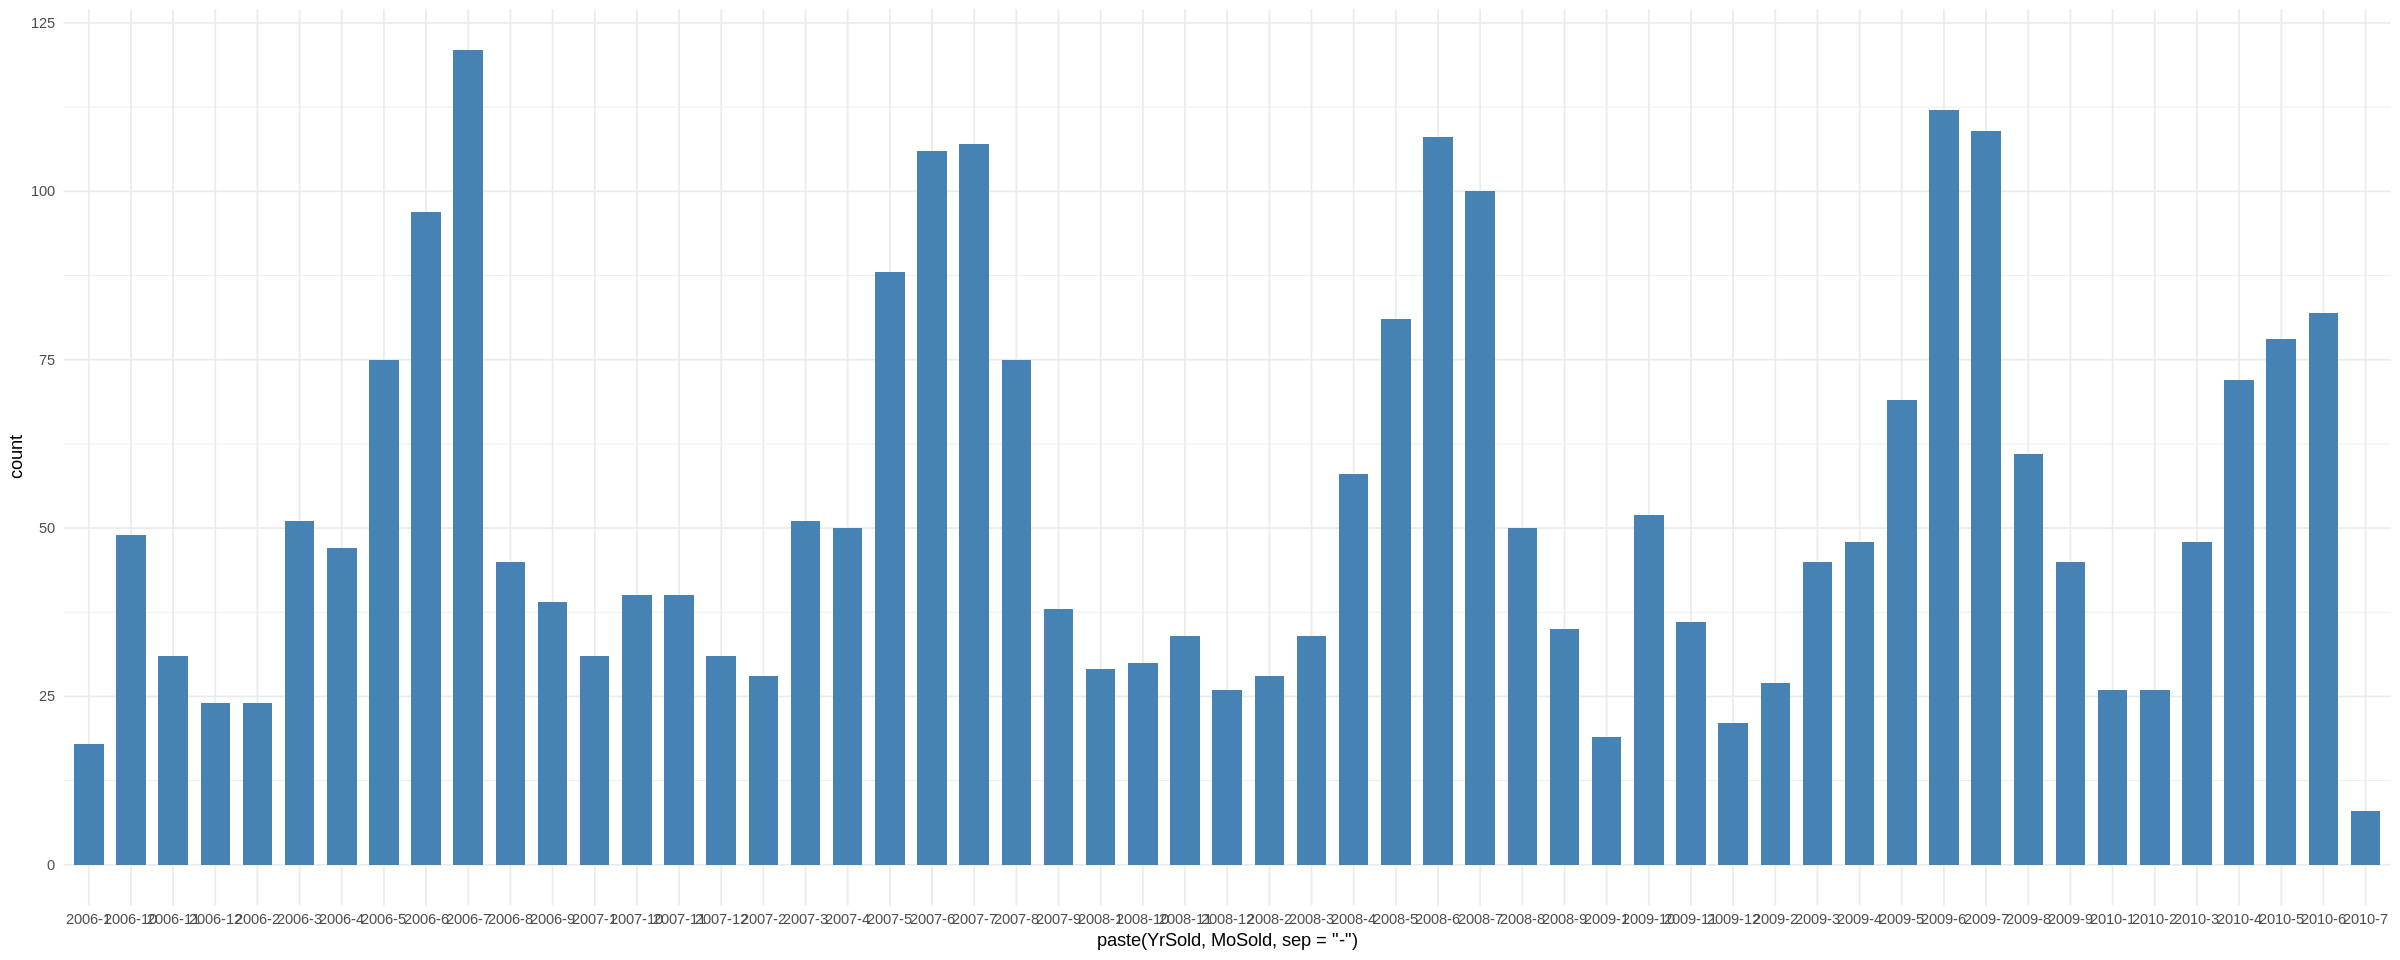

In [6]:
ggplot(housing_df, aes(x=paste(YrSold,MoSold,sep='-'))) + geom_bar(stat="count", width=0.7,fill="steelblue") +  theme_minimal()

## Quality and Condition
From the table below we can see a direct relation between Overall Quality and Condition.

In [7]:
table(housing_df$OverallQual);table(housing_df$OverallCond);prop.table(table(housing_df$OverallCond,housing_df$OverallQual),2)


  1   2   3   4   5   6   7   8   9  10 
  4  13  40 225 822 728 592 342 107  30 


   1    2    3    4    5    6    7    8    9 
   7   10   49  101 1632  531  388  144   41 

   
              1           2           3           4           5           6
  1 0.250000000 0.076923077 0.025000000 0.008888889 0.002433090 0.000000000
  2 0.000000000 0.153846154 0.050000000 0.004444444 0.003649635 0.001373626
  3 0.500000000 0.230769231 0.200000000 0.048888889 0.019464720 0.009615385
  4 0.000000000 0.230769231 0.225000000 0.137777778 0.052311436 0.013736264
  5 0.250000000 0.307692308 0.275000000 0.337777778 0.363746959 0.484890110
  6 0.000000000 0.000000000 0.150000000 0.244444444 0.267639903 0.239010989
  7 0.000000000 0.000000000 0.025000000 0.182222222 0.215328467 0.162087912
  8 0.000000000 0.000000000 0.050000000 0.026666667 0.064476886 0.081043956
  9 0.000000000 0.000000000 0.000000000 0.008888889 0.010948905 0.008241758
   
              7           8           9          10
  1 0.000000000 0.000000000 0.000000000 0.000000000
  2 0.000000000 0.000000000 0.009345794 0.000000000
  3 0.001689189 0.000000000 0.009345794 0.000000000
  4 0.006756757 0.002923

## Neighborhood data
There were more sales in particular neighborhoods - which is most likely contributed to the actual population density (more people leaving in same areas such as closer to the city)

In [8]:
table(housing_df$Neighborhood)


Blmngtn Blueste  BrDale BrkSide ClearCr CollgCr Crawfor Edwards Gilbert  Greens 
     28      10      30     107      44     265     102     192     160       8 
GrnHill  IDOTRR Landmrk MeadowV Mitchel   NAmes NoRidge NPkVill NridgHt  NWAmes 
      2      92       1      37     114     443      71      23     164     131 
OldTown  Sawyer SawyerW Somerst StoneBr   SWISU  Timber Veenker 
    239     151     124     172      51      48      70      24 

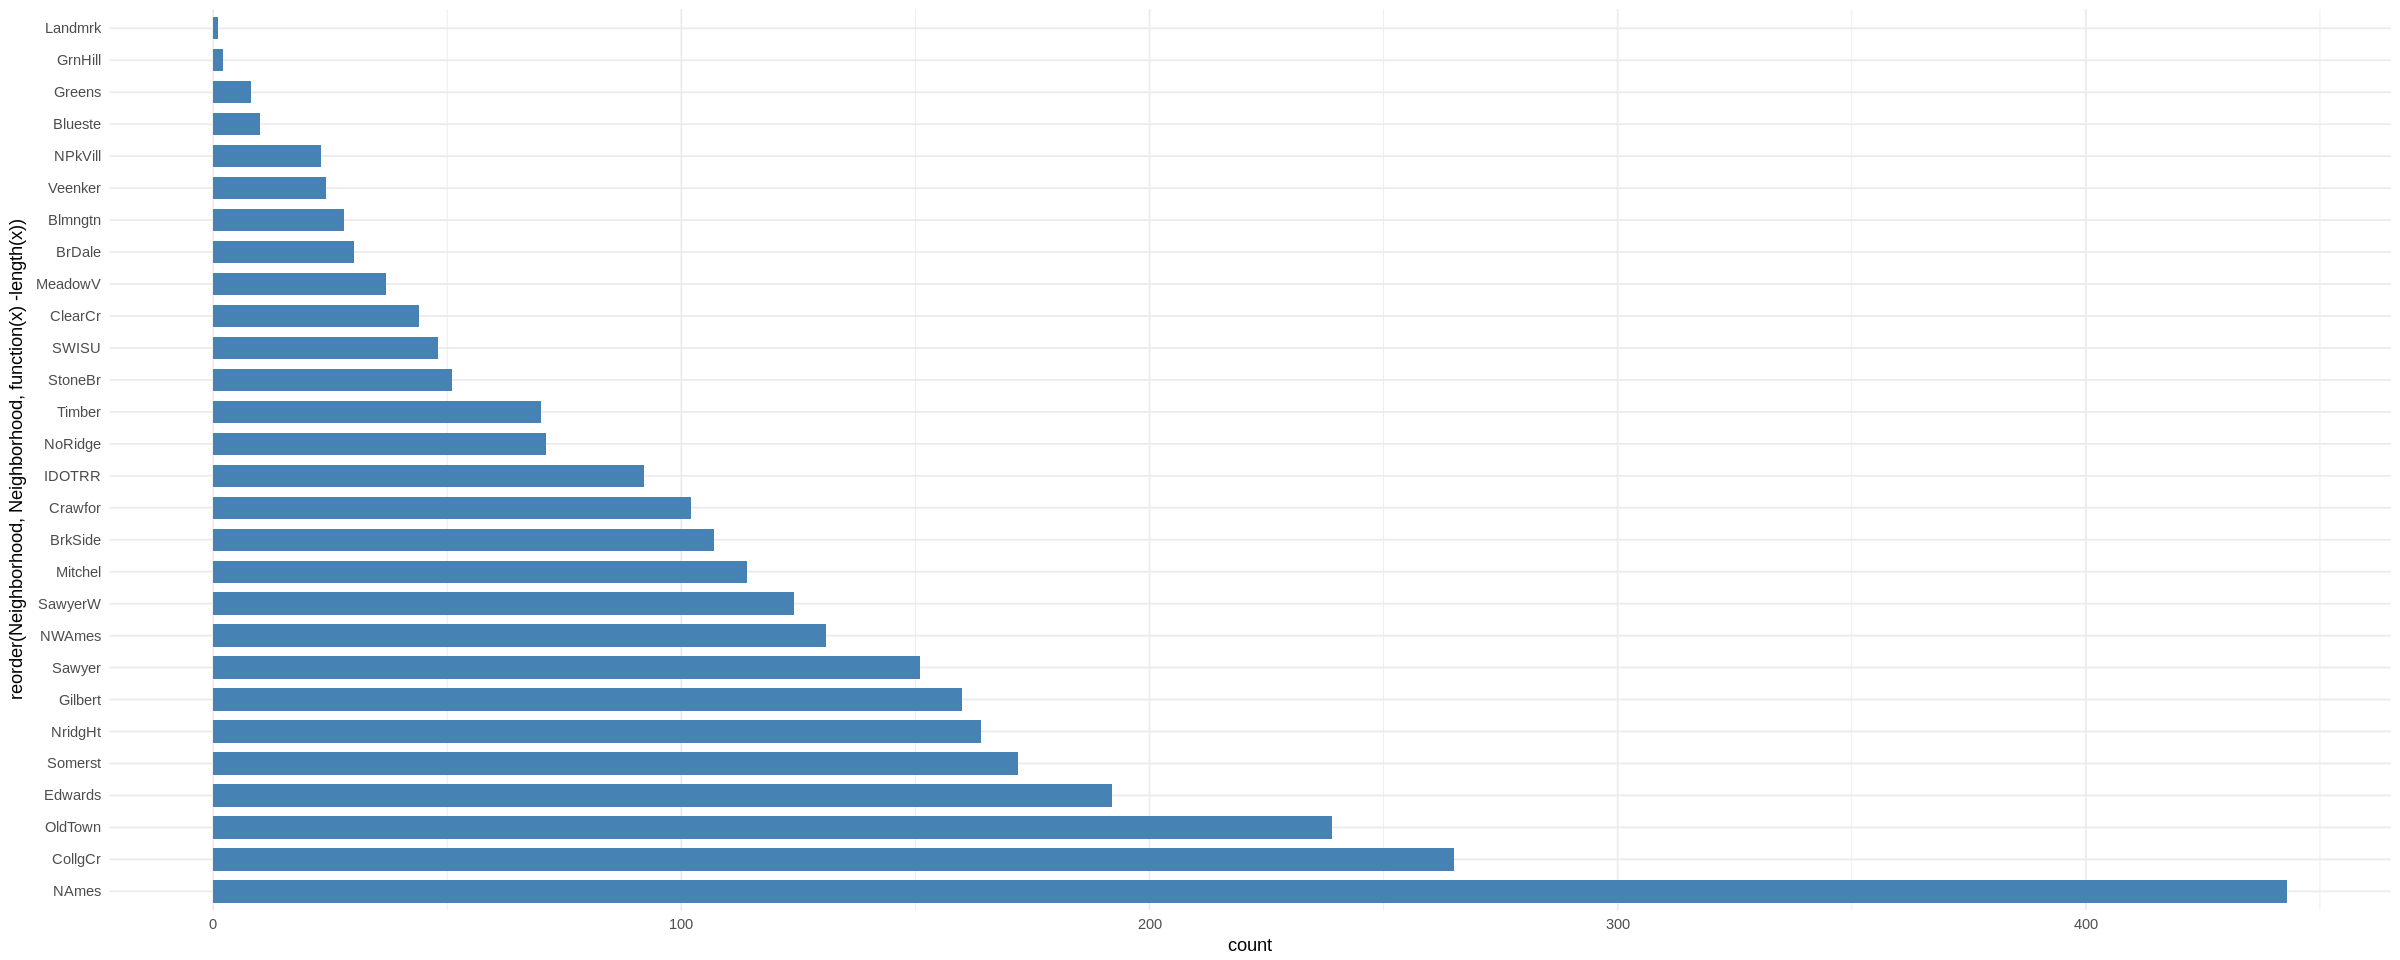

In [9]:
ggplot(housing_df, aes(x=reorder(Neighborhood,Neighborhood,function(x)-length(x)))) + geom_bar(stat="count", width=0.7,fill="steelblue") +  theme_minimal() + coord_flip()

Furthermore, from the plot below we can see that the sale price has a direct relationship to the neighborhood.

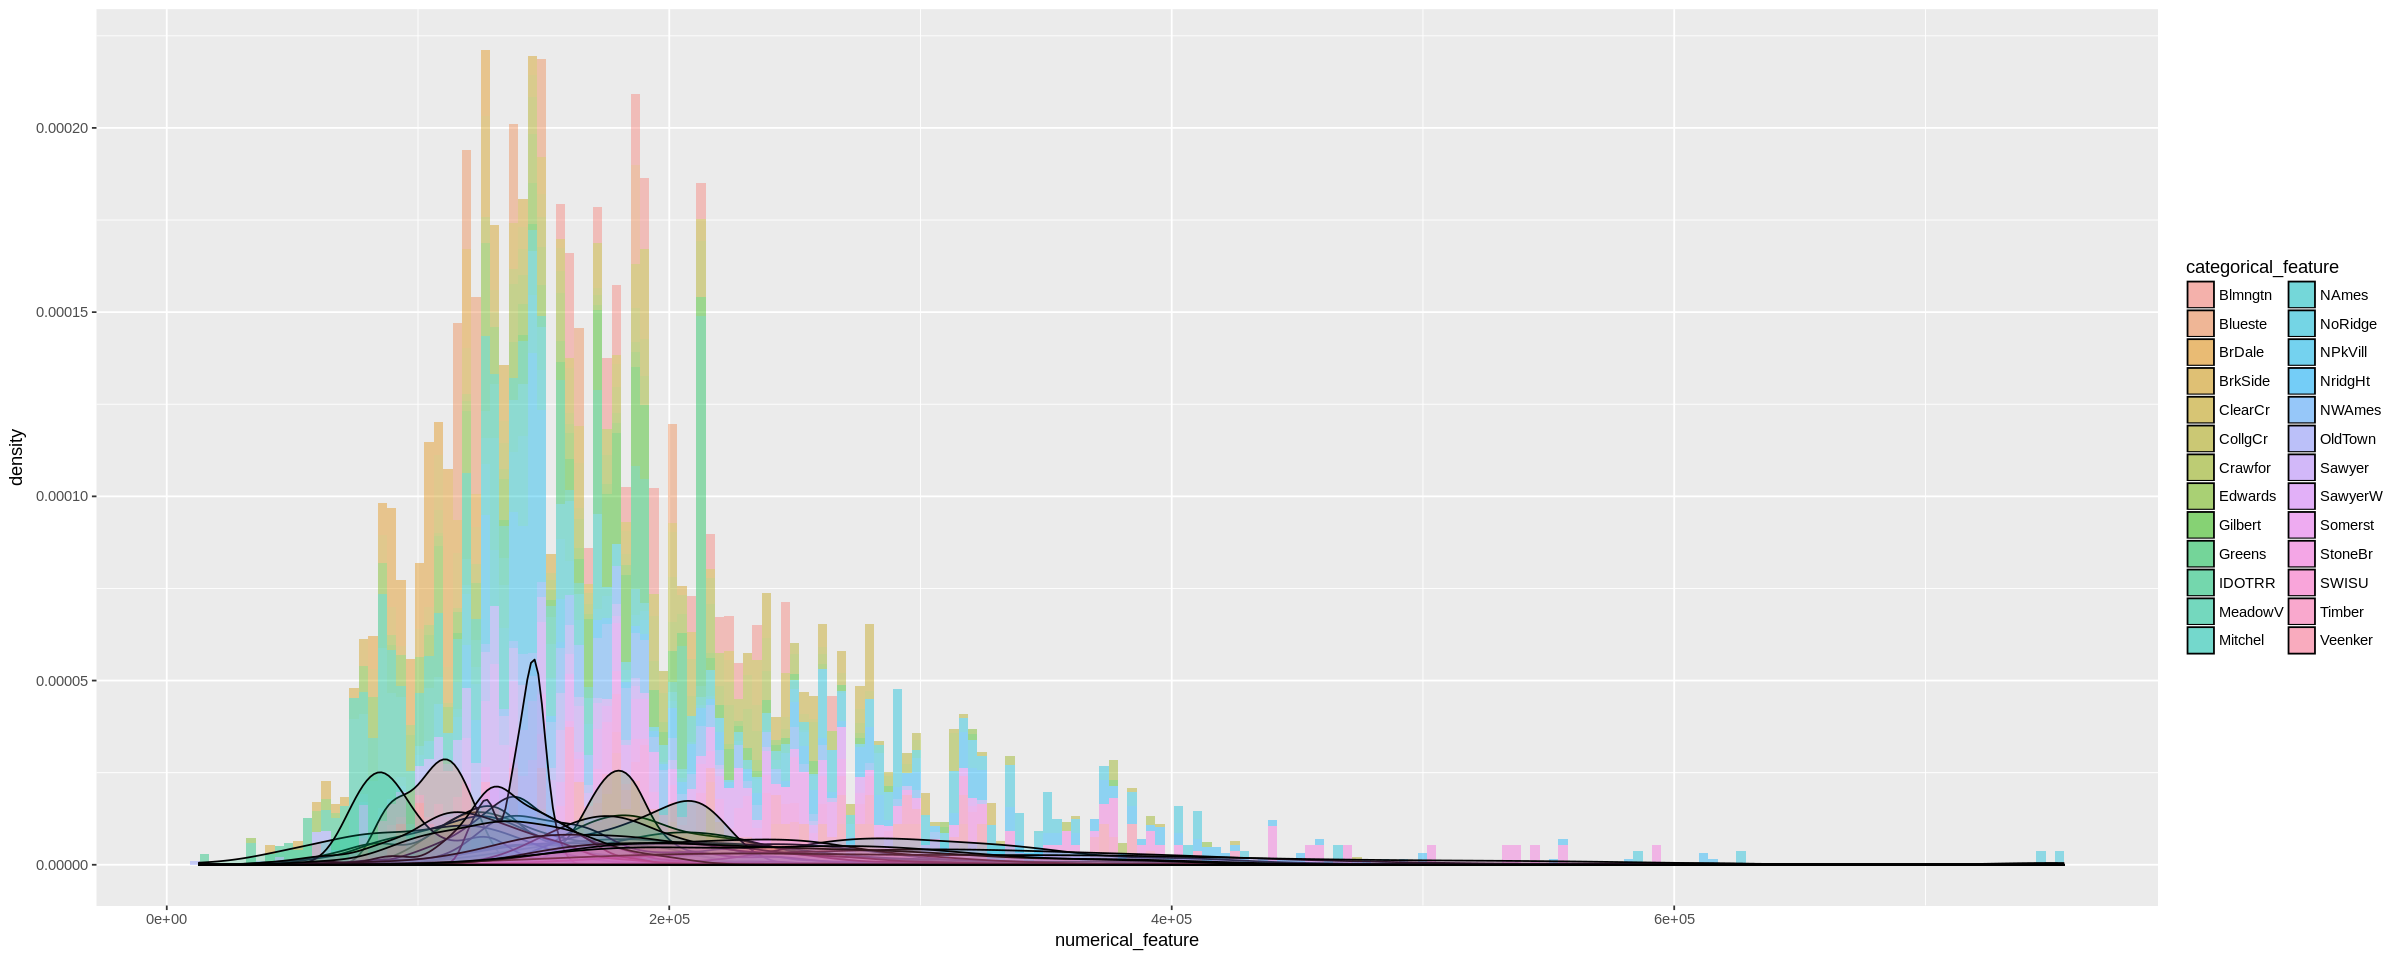

In [10]:
neighborhood_df <- count(housing_df,'Neighborhood')
n_df <- neighborhood_df$Neighborhood[neighborhood_df$freq > 2]
hist_with_kde_numerical_by_category(housing_df$SalePrice[housing_df$Neighborhood %in% n_df], housing_df$Neighborhood[housing_df$Neighborhood %in% n_df])

## Sale Price
This plot indicates that the prices are positively skewed to the right with a large number of outliers. This means that a small portion of our population is affecting the distribution of our data.

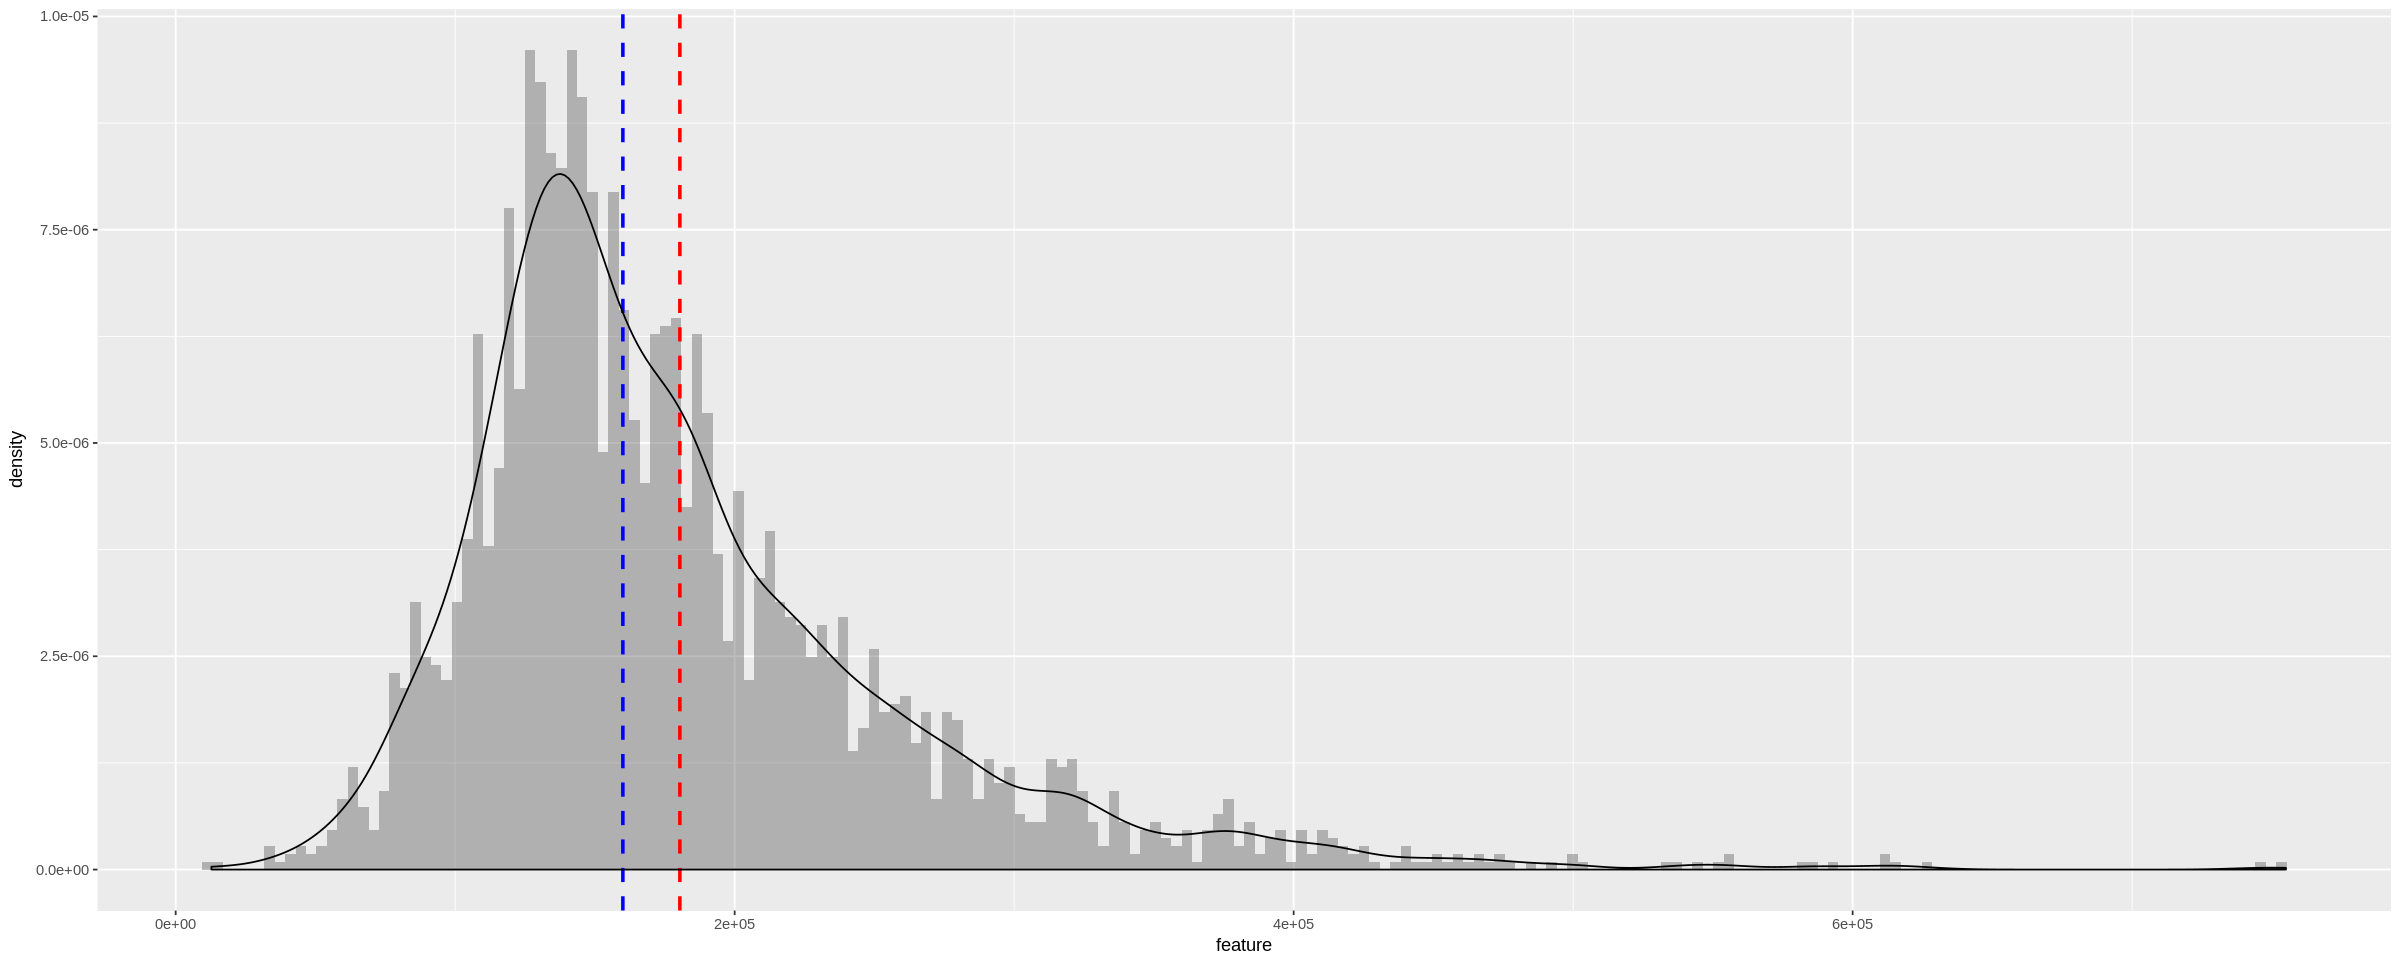

In [11]:
hist_with_kde(housing_df$SalePrice)

## Ground Living Area Square Feet
We can see that the same as sales price is true for the square footage. That is there are a few very large properties.

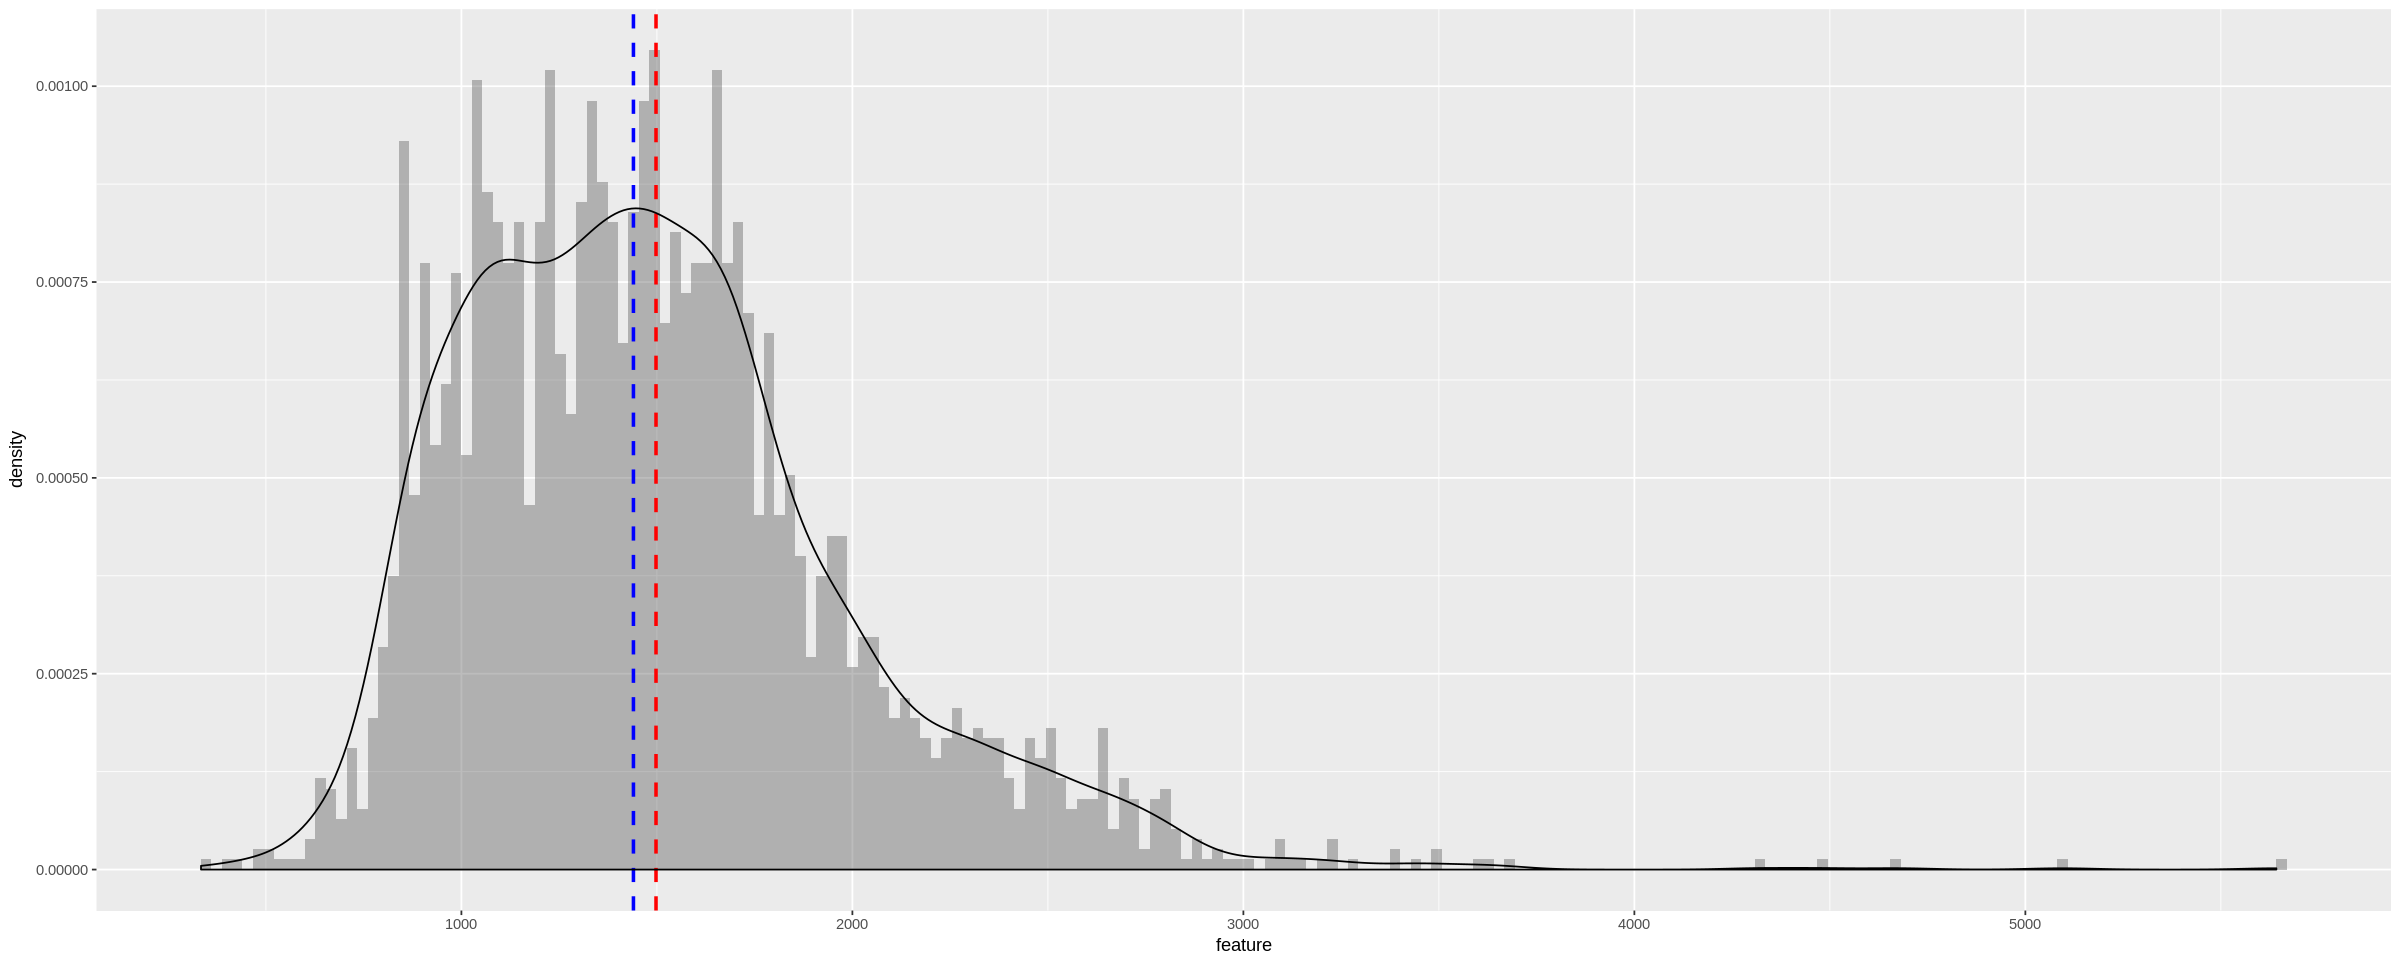

In [12]:
hist_with_kde(housing_df$GrLivArea)

## Looking at the relationship between some features in pairs
From the plots below, we can view that there is a direct linear relationship between the sale price and the following variables:
Lot Size in Square Foot, Year Built and Ground Living Area in Square Foot.

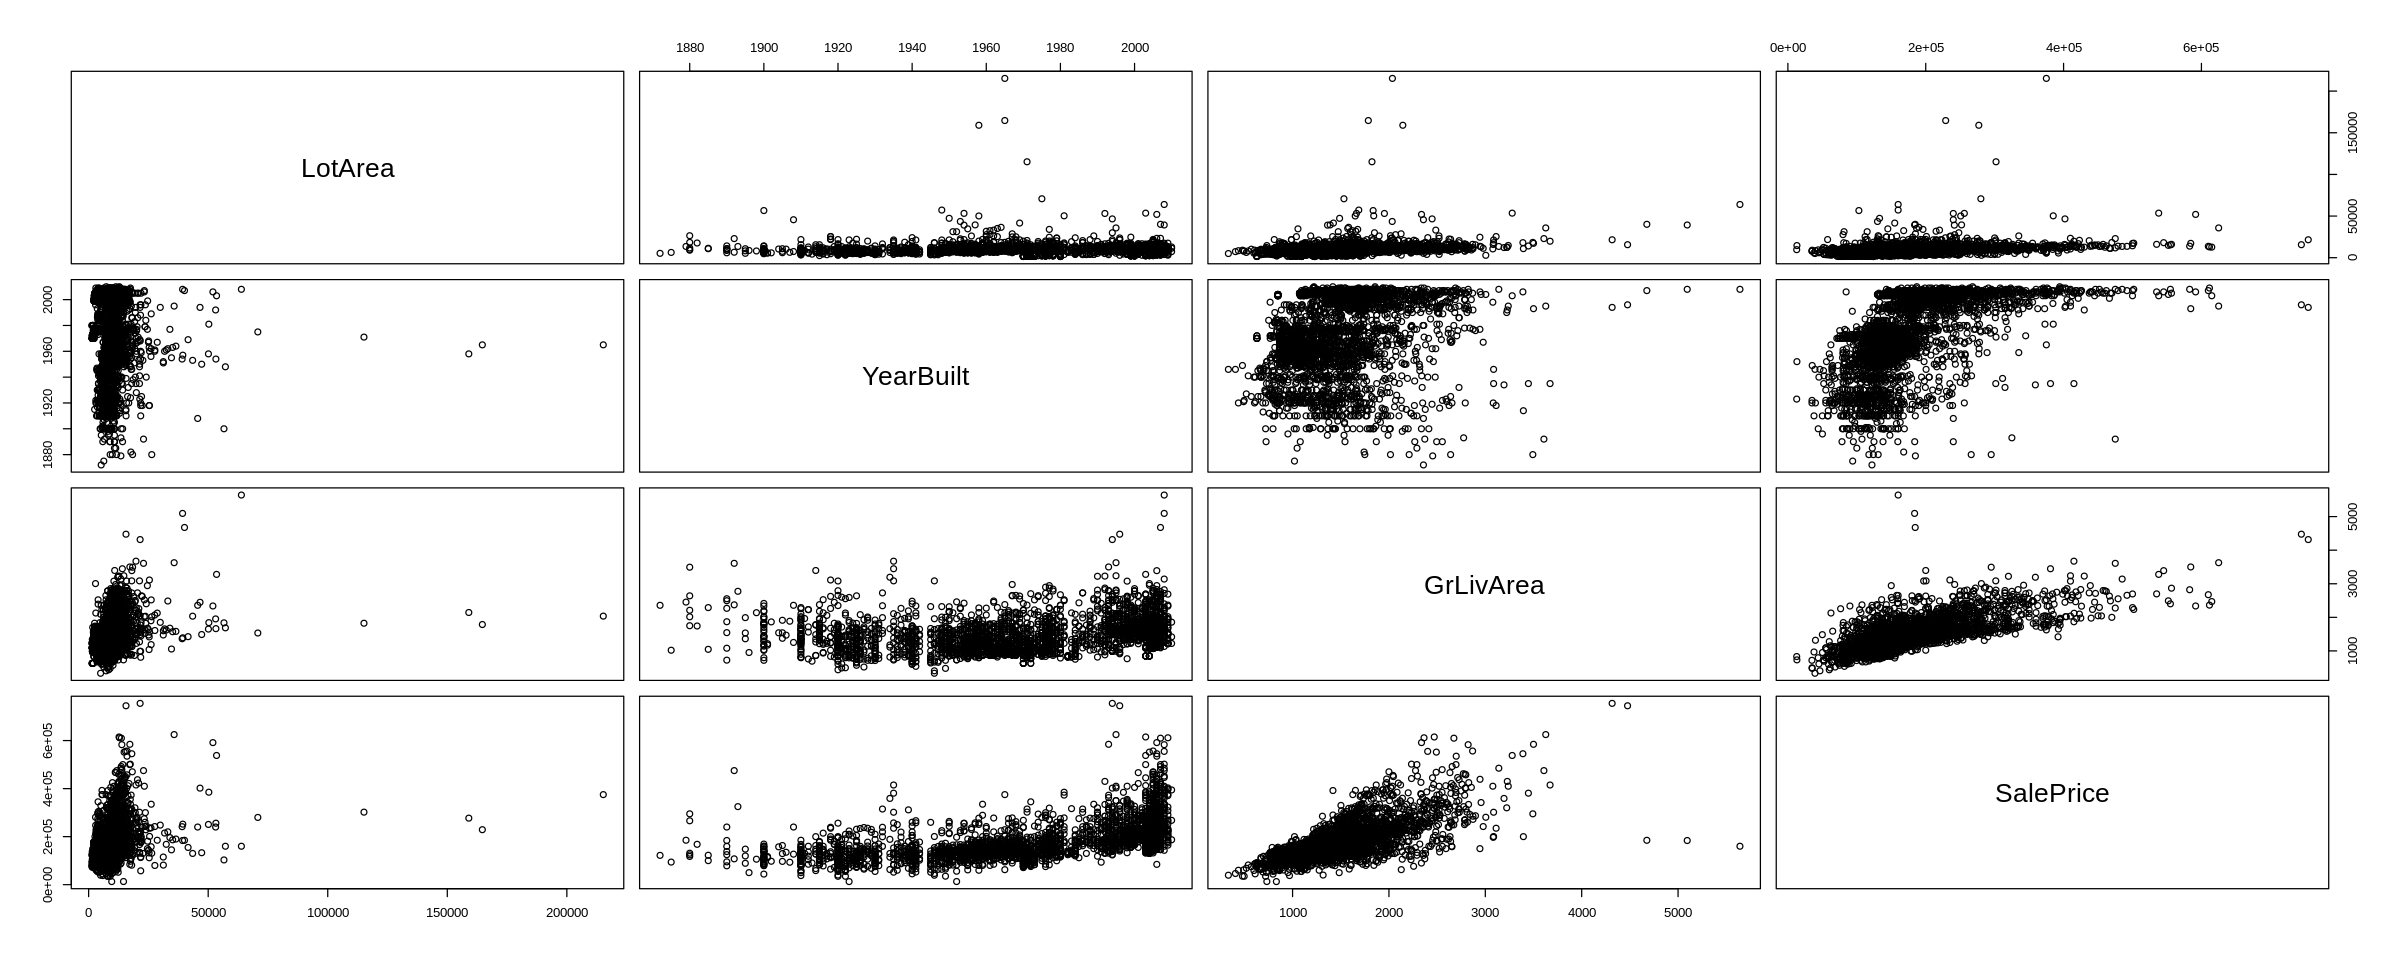

In [13]:
pairs(numeric_df[,c(2,3,13,24)])